<a href="https://colab.research.google.com/github/ArunKumar2730/Quora-Question-Similarity-Problem-EDA/blob/main/Quora_question_similarity_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm




# **Reading dataset and basic stats**

In [ ]:
#Reading csv file data into google colab from google drive


from google.colab import drive

drive.mount('/content/drive')

path = '/content/drive/My Drive/Quora case study dataset/train.csv'

df = pd.read_csv(path)




Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#Displaying total no of rows in dataset

print ("No of rows in dataset:",len(df.index))

No of rows in dataset: 404290


In [ ]:
#display top 5 rows to get sense of the dataset

df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [ ]:
#Get concise summary of a DataFrame including no of null values in each columns

df.info()


#we can see question 1 and question 2 column  has null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [ ]:
#Remove rows that have NAN values (as we have only 3 rows with null value we can remove the rows completely)
#If we have large number of rows with null values in dataset then we should not remove those rows beacuse we will lose amount of data

#inplace=True means it will do changes in original dataframe itself and return it

df.dropna(axis = 0,inplace = True)


In [ ]:
#check again null values are removed or not

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404287 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404287 non-null  int64 
 1   qid1          404287 non-null  int64 
 2   qid2          404287 non-null  int64 
 3   question1     404287 non-null  object
 4   question2     404287 non-null  object
 5   is_duplicate  404287 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 21.6+ MB


# **Distribution of data points among output classes**
Number of duplicate(smilar) and non-duplicate(non similar) questions

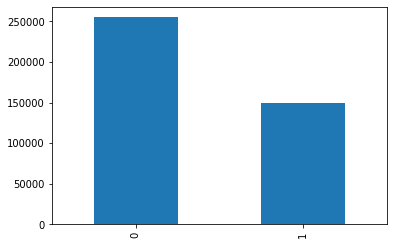

In [ ]:
#frequency of class labels and plot bar graph using pandas.dataframe.plot.bar()

df['is_duplicate'].value_counts().plot.bar(x ='is_duplicate',y='frequency')


In [ ]:
#percentage value of class lablel points

percent = df['is_duplicate'].value_counts(normalize = True)

print(percent.mul(100).round(2).astype('str') + '%' )



0    63.08%
1    36.92%
Name: is_duplicate, dtype: object


# **No of unique questions in dataset**

In [ ]:
qids = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())

unique_qs = len(np.unique(qids))
ques_morethan_onetime = np.sum(qids.value_counts() > 1)

print("Total number of unique question occuring more than one time:",ques_morethan_onetime)
print("Percentage of unique question occuring more than one time:",(ques_morethan_onetime/unique_qs)*100)

#getting max value of single question repeated

print("Maximum number of times single question repeated:",max(qids.value_counts()))


#This mean 80% of unique values occur only one time and remaining 20% occur more than one time


Total number of unique question occuring more than one time: 111778
Percentage of unique question occuring more than one time: 20.779322178205675
Maximum number of times single question repeated: 157


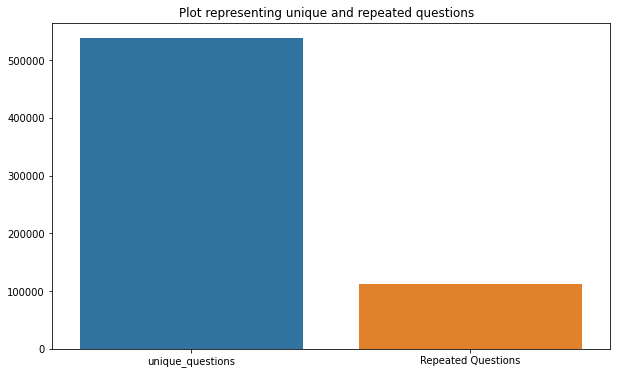

In [ ]:
x = ["unique_questions" , "Repeated Questions"]
y =  [unique_qs , ques_morethan_onetime]

plt.figure(figsize=(10, 6))
plt.title ("Plot representing unique and repeated questions  ")
sns.barplot(x,y)
plt.show()

# **Checking duplicate questions**

In [ ]:
duplicate_rows = df[df.duplicated(subset=['qid1','qid2'], keep=False)].sum()

print('No of duplicate questons:',duplicate_rows['is_duplicate'].astype('int').round())

No of duplicate questons: 0


Maximum no of times single question occur: 157


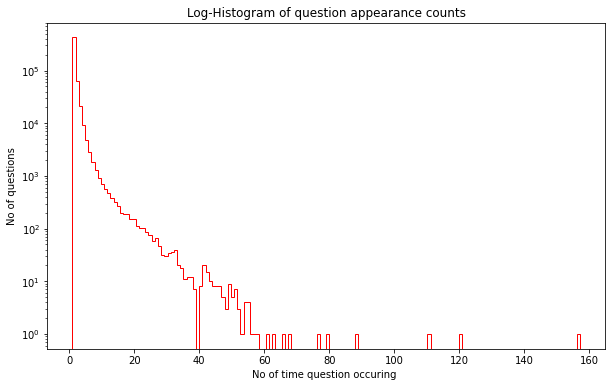

In [ ]:
#plot histogram to see distribution o dataset

#Here Y-AXIS is taken in log scale

plt.figure(figsize= (10,6))
plt.hist(qids.value_counts(),bins = 160,histtype='step',color = 'red')
plt.yscale('log')
plt.xlabel('No of time question occuring ')
plt.ylabel("No of questions")
plt.title('Log-Histogram of question appearance counts')

print('Maximum no of times single question occur:',max(qids.value_counts()))

# **Feature Engineering: Basic feature extraction**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = df.pop('is_duplicate')
X = df

In [ ]:
X_1,X_test,y_1,y_test = train_test_split(X,y,test_size = 0.2,random_state = 40,stratify = y)

In [ ]:
X_train,X_cv,y_train,y_cv = train_test_split(X_1,y_1,test_size = 0.2,random_state = 40,stratify = y_1)

In [ ]:
print('Shape of X_train:',X_train.shape)
print('Shape of y_train:',y_train.shape)
print('Shape of X_cv:',X_cv.shape)
print('Shape of y_cv:',y_cv.shape)
print('Shape of X_test:',X_test.shape)
print('Shape of y_test:',y_test.shape)


Shape of X_train: (258743, 5)
Shape of y_train: (258743,)
Shape of X_cv: (64686, 5)
Shape of y_cv: (64686,)
Shape of X_test: (80858, 5)
Shape of y_test: (80858,)


In [ ]:
#Calculating frequency of question 1. and question 2:
#Append both features into train set

pd.options.mode.chained_assignment = None 

X_train['freq_qid1'] = X_train['qid1'].map(X_train['qid1'].value_counts())

X_train['freq_qid2'] = X_train['qid2'].map(X_train['qid2'].value_counts())



In [ ]:
#Calculating length of question 1 (string) and question 2 (string):
#Appending both columns in to train set

X_train['q1len'] = X_train['question1'].apply(len)

X_train['q2len'] = X_train['question2'].apply(len)

In [ ]:
a = 'Which fish would survive in salt water?'

a.split()

['Which', 'fish', 'would', 'survive', 'in', 'salt', 'water?']

In [ ]:
#Calculating no of words in question 1 (string) and no of words in question 2 (string):
#Appending both columns in to train set

X_train['q1_n_words'] = X_train['question1'].str.split().str.len()

X_train['q2_n_words'] = X_train['question2'].str.split().str.len()

In [ ]:
#Calculating freq_qid1 + freq_qid2

#append the column to trainset

X_train['freq_qid1 + freq_qid2'] = X_train['freq_qid1']+X_train['freq_qid2']


In [ ]:
#Calculating freq_qid1 - freq_qid2

#append the column to trainset


X_train['freq_qid1 - freq_qid2' ] = abs(X_train['freq_qid1'] - X_train['freq_qid2'])


In [ ]:
def normalized_word_Common(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * len(w1 & w2)
X_train['word_Common'] = X_train.apply(normalized_word_Common, axis=1)


In [ ]:
def normalized_word_Total(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * (len(w1) + len(w2))
X_train['word_Total'] = df.apply(normalized_word_Total, axis=1)


In [ ]:
def normalized_word_share(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * len(w1 & w2)/(len(w1) + len(w2))
X_train['word_share'] = X_train.apply(normalized_word_share, axis=1)



In [ ]:
print("Shape of train set after adding few more features:",X_train.shape)

Shape of train set after adding few more features: (258743, 16)


#***Analysis of some of the extracted features ***
Here are some questions have only one single words

In [ ]:
print ("Minimum length of the questions in question1 : " , min(X_train['q1_n_words']))

print ("Minimum length of the questions in question2 : " , min(X_train['q2_n_words']))

print ("Number of Questions with minimum length [question1] :", X_train[X_train['q1_n_words']== 1].shape[0])
print ("Number of Questions with minimum length [question2] :", X_train[X_train['q2_n_words']== 1].shape[0])

Minimum length of the questions in question1 :  1
Minimum length of the questions in question2 :  1
Number of Questions with minimum length [question1] : 44
Number of Questions with minimum length [question2] : 16


In [ ]:
#Appending X_train and y_train to plot violin plot/PDF :

df_col_merged =pd.concat([X_train, y_train], axis=1)

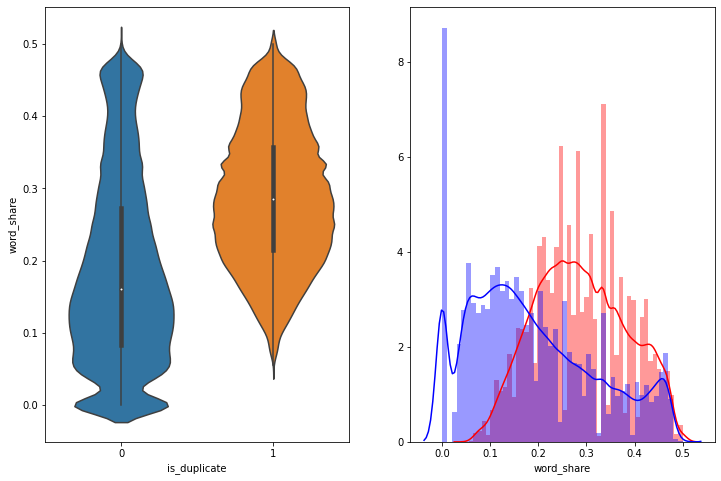

In [ ]:
#Feature: word_share

plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_share', data = df_col_merged[0:])

plt.subplot(1,2,2)
sns.distplot(df_col_merged[df_col_merged['is_duplicate'] == 1.0]['word_share'][0:] , label = "1", color = 'red')
sns.distplot(df_col_merged[df_col_merged['is_duplicate'] == 0.0]['word_share'][0:] , label = "0" , color = 'blue' )
plt.show()

# **Storing trainset frequency values of qid1 & qid2 into seperate dictionaries** 

In [ ]:
qid1_freq_df = X_train[['qid1','freq_qid1']]

In [ ]:
dict_freq_qid1 = pd.Series(qid1_freq_df.freq_qid1.values,index=qid1_freq_df.qid1).to_dict()

In [ ]:
qid2_freq_df = X_train[['qid2','freq_qid2']]


dict_freq_qid2 = pd.Series(qid2_freq_df.freq_qid2.values,index=qid2_freq_df.qid2).to_dict()


# **Transforming train set frequency values fof qid 1 & qid2 intto test/cv**

We are doing this to avoid data leakage

In [ ]:
#Mapping dictionary values of freq_qid1 & freq_qid2 with test set qid 1 and qid 2 column
#Appending new feature into test set

X_test['freq_qid1'] = X_test['qid1'].map(dict_freq_qid1)

X_test['freq_qid2'] = X_test['qid2'].map(dict_freq_qid2)

#qid1 which are available in test set but not in train set will be as NAN in test set freq
#so replacing NAN values with 0's

X_test['freq_qid1'] = X_test['freq_qid1'].fillna(0).astype('int')
X_test['freq_qid2'] = X_test['freq_qid2'].fillna(0).astype('int')

In [ ]:
#Mapping dictionary values of freq_qid 1 with CV set qid 1 & qid 2 column
#Appending new feature into CV set

X_1['freq_qid1'] = X_1['qid1'].map(dict_freq_qid1)

X_1['freq_qid2'] = X_1['qid2'].map(dict_freq_qid2)

#qid1 which are available in test set but not in train set will be as NAN in CV set freq
#so replacing NAN values with 0's

X_1['freq_qid1'] = X_1['freq_qid1'].fillna(0).astype('int')
X_1['freq_qid2'] = X_1['freq_qid2'].fillna(0).astype('int')

In [ ]:
X_1

,id,qid1,qid2,question1,question2,freq_qid1,freq_qid2
141503,141503,224626,63262,What are the ways to prepare for Assam CEE?,How should I plan my preparation for GRE?,0,6
21860,21860,41099,41100,Is Taco Bell bad for you?,Is Taco Bell good?,2,1
162458,162458,184181,252904,Does a proper push-up imply that the chest mus...,How much body weight is used on a push up?,2,1
43994,43994,78632,79054,How is life in prison?,What is it like to be in prison?,2,2
114065,114065,186251,186252,What are the best books for ICSE class 9?,What is the best textbook for class 9 icse?,2,1
...,...,...,...,...,...,...,...
267265,267265,368813,61769,@Lesbians: How exactly do you have sex?,How is lesbian sex?,2,1
328455,328455,454993,454994,What is the difference between a server and a ...,What is the difference between database and se...,0,0
112719,112719,184388,184389,What are the main reasons why students from th...,What are the main reasons why students from th...,1,1
75816,75816,129685,129686,Why does peanut exposure help prevent peanut a...,Does keeping children away from allergens like...,1,1


# **Text Precprocesssing**


*   Removing HTML tags
*   Removing Punctuations
*   Performing stemming
*   Removing Stopwords
*   Expanding contractions etc.


In [ ]:
!pip install distance

     |████████████████████████████████| 184kB 5.1MB/s 
  Created wheel for distance: filename=Distance-0.1.3-cp36-none-any.whl size=16261 sha256=90b9224d5710feabc4f5cb88345b66c5e1855b4661119be7e54aa14ed36d557b
  Stored in directory: /root/.cache/pip/wheels/d5/aa/e1/dbba9e7b6d397d645d0f12db1c66dbae9c5442b39b001db18e
Successfully built distance


In [ ]:
#Importing nltk library

#Downloading stopwords corpus in my machine

import nltk

nltk.download('stopwords')

nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.stem import PorterStemmer

from bs4 import BeautifulSoup

from nltk.corpus import stopwords

import re

STOP_WORDS = stopwords.words('english')

SAFE_DIV = 0.0001 

def preprocess(x):

  x = str(x).lower()

  x = x.replace(',000,000','m').replace(',000','k').replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
  x = re.sub(r"([0-9]+)000000", r"\1m", x)
  x = re.sub(r"([0-9]+)000", r"\1k", x)
    

  porter = PorterStemmer()
  pattern = re.compile('\W')
    
  if type(x) == type(''):

    x = re.sub(pattern, ' ', x)
    
    
  if type(x) == type(''):

    x = porter.stem(x)
    example1 = BeautifulSoup(x)
    x = example1.get_text()
               
    
  return x



# **Advanced Feature Extraction (Fuzzy Features) **

fuzz_ratio : https://github.com/seatgeek/fuzzywuzzy#usage http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/


fuzz_partial_ratio : https://github.com/seatgeek/fuzzywuzzy#usage http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/


token_sort_ratio : https://github.com/seatgeek/fuzzywuzzy#usage http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/

token_set_ratio : https://github.com/seatgeek/fuzzywuzzy#usage http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/




In [ ]:
!pip install fuzzywuzzy

In [ ]:
# preprocessing each question
X_train["question1"] = X_train["question1"].fillna("").apply(preprocess)
X_train["question2"] = X_train["question2"].fillna("").apply(preprocess)

In [ ]:
pip install python-Levenshtein

     |████████████████████████████████| 51kB 2.5MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.0-cp36-cp36m-linux_x86_64.whl size=144792 sha256=b0e7fc325ac64b59b3d8e61793309765f4eeb68cbc6729e72e526e9252b658ba
  Stored in directory: /root/.cache/pip/wheels/de/c2/93/660fd5f7559049268ad2dc6d81c4e39e9e36518766eaf7e342
Successfully built python-Levenshtein


In [ ]:
from fuzzywuzzy import fuzz

X_train["token_set_ratio"]       = X_train.apply(lambda x: fuzz.token_set_ratio(x["question1"], x["question2"]), axis=1)
# The token sort approach involves tokenizing the string in question, sorting the tokens alphabetically, and 
# then joining them back into a string We then compare the transformed strings with a simple ratio().
X_train["token_sort_ratio"]      = X_train.apply(lambda x: fuzz.token_sort_ratio(x["question1"], x["question2"]), axis=1)
X_train["fuzz_ratio"]            = X_train.apply(lambda x: fuzz.QRatio(x["question1"], x["question2"]), axis=1)
X_train["fuzz_partial_ratio"]    = X_train.apply(lambda x: fuzz.partial_ratio(x["question1"], x["question2"]), axis=1)

In [ ]:
print('Shape of X_train is:',X_train.shape)

Shape of X_train is: (258743, 20)


# **Analysis of Extracted features**

In [ ]:
y_train = pd.DataFrame(y_train)

In [ ]:
y_train

,is_duplicate
14476,0
234044,1
402263,0
73916,0
53086,1
...,...
1071,0
365214,0
116343,0
247594,0


In [ ]:
print("Number of data points in class 1 (duplicate pairs)", np.count_nonzero(y_train['is_duplicate']==0))
print("Number of data points in class 0 (non-duplicate pairs)", np.count_nonzero(y_train['is_duplicate']))



Number of data points in class 1 (duplicate pairs) 163215
Number of data points in class 0 (non-duplicate pairs) 95528


In [ ]:
#Creating new dataframe by combining X_train set column(question1,question2) & y_train set column(is_duplicate)

#feature_flatten is new dataframe which I will use for creating word cloud visualization

feature_flatten =X_train[['question1','question2']]
feature_flatten['is_duplicate'] = y_train['is_duplicate']
feature_flatten

,question1,question2,is_duplicate
14476,what are some interesting irrational things ...,is playing video games a waste of time,0
234044,how can i treat an earlobe cyst,how can you treat a cyst on the earlobe,1
402263,what are some things new employees should know...,what are some things new employees should know...,0
73916,i am girl in mechanical engineering what are ...,how can i get a job in france,0
53086,which are the best brain games in android,what are some best brain games for android,1
...,...,...,...
1071,do indian girls use dildos what kind of dildo,what is the size of the biggest dildo,0
365214,is www socialtrade biz a scam,is zoosk a scam,0
116343,what is the correct usage of the and the,what is the correct usage of having,0
247594,what are the advantages to being an only child,what are the disadvantages of being an only ch...,0


In [ ]:
feature_duplicate = feature_flatten[feature_flatten['is_duplicate'] == 1]
feature_nonduplicate = feature_flatten[feature_flatten['is_duplicate'] == 0]

# Converting 2d array of q1 and q2 and flatten the array: like {{1,2},{3,4}} to {1,2,3,4}
p = np.dstack([feature_duplicate["question1"], feature_duplicate["question2"]]).flatten()
n = np.dstack([feature_nonduplicate["question1"], feature_nonduplicate["question2"]]).flatten()

print ("Number of data points in class 1 (duplicate pairs) :",len(p))
print ("Number of data points in class 0 (non duplicate pairs) :",len(n))

#Saving the np array into a text file
np.savetxt('train_p.txt', p, delimiter=' ', fmt='%s')
np.savetxt('train_n.txt', n, delimiter=' ', fmt='%s')

Number of data points in class 1 (duplicate pairs) : 191056
Number of data points in class 0 (non duplicate pairs) : 326430


In [ ]:
# reading the text files and removing the Stop Words:

from os import path

from wordcloud import WordCloud, STOPWORDS

d = path.dirname('.')

textp_w = open(path.join(d, 'train_p.txt')).read()
textn_w = open(path.join(d, 'train_n.txt')).read()
stopwords = set(STOPWORDS)
stopwords.add("said")
stopwords.add("br")
stopwords.add(" ")
stopwords.remove("not")

stopwords.remove("no")
#stopwords.remove("good")
#stopwords.remove("love")
stopwords.remove("like")
#stopwords.remove("best")
#stopwords.remove("!")
print ("Total number of words in duplicate pair questions :",len(textp_w))
print ("Total number of words in non duplicate pair questions :",len(textn_w))

Total number of words in duplicate pair questions : 10303133
Total number of words in non duplicate pair questions : 21242804


Word Cloud for similar question pairs


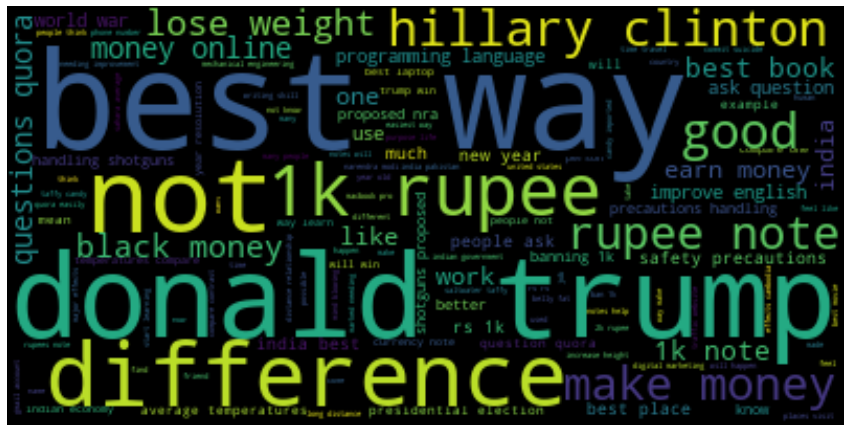

In [ ]:
#word cloud visualization

#Bigger the word,it means that frequency of word is high 

wc = WordCloud(background_color="black", max_words=len(textp_w), stopwords=stopwords)
wc.generate(textp_w)
print ("Word Cloud for similar question pairs")
plt.figure(figsize= (15,20))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Word Cloud for non-similar question pairs


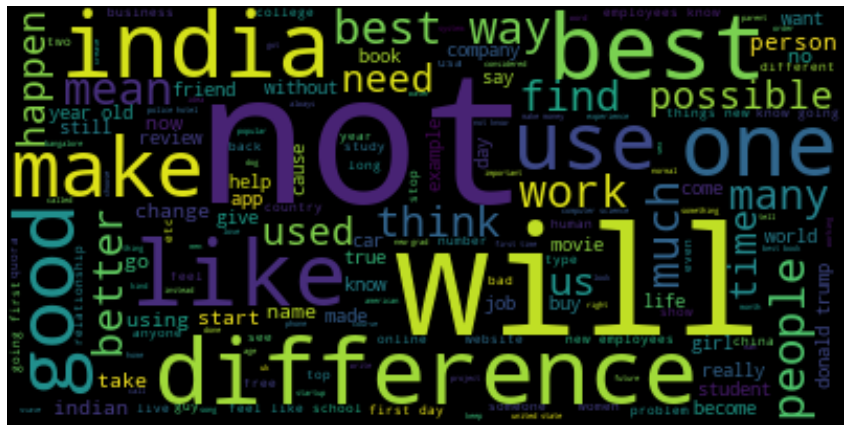

In [ ]:
wc = WordCloud(background_color="black", max_words=len(textn_w), stopwords=stopwords)
wc.generate(textn_w)
print ("Word Cloud for non-similar question pairs")
plt.figure(figsize= (15,20))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()